# 일변량 통계에 대한 함수 selectPercentile()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data,noise])

In [ ]:
cancer.data.shape

In [ ]:
X_w_noise.shape

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,
                                                random_state=0,test_size=.5)

In [ ]:
print(X_train.shape,X_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

# selectPercentile()함수 자체는 아노바 분석처럼 변수간의 유의확률 중 가장 높은 변수들을 가져오고 필요 없는 변수들을 제거해줌

In [ ]:
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train,y_train)

In [ ]:
X_train_selected = select.transform(X_train)

In [ ]:
X_train_selected.shape

In [ ]:
mask = select.get_support()
print(mask)
import matplotlib.pyplot as plt

plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("feature number")
plt.yticks([0])

In [ ]:
X_test_selected = select.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_selected,y_train)
lr.score(X_test_selected,y_test)

In [ ]:
from sklearn.svm import LinearSVC
lr = LinearSVC()
lr.fit(X_train_selected,y_train)
lr.score(X_test_selected,y_test)

# p311 전문가 지식 활용 (citibike) 데이터

In [1]:
import mglearn.datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
citibike = mglearn.datasets.load_citibike()
print("citibike_data:\n",citibike.head())

citibike_data:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

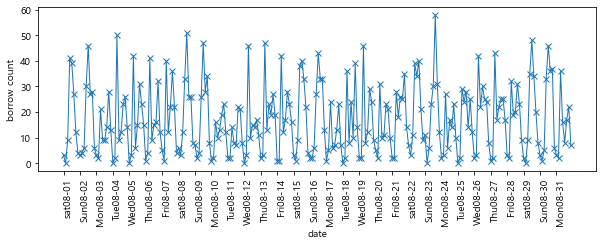

In [21]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(),end=citibike.index.max(),
                      freq='D')
week = ["Sun","Mon","Tue","Wed","Thu","Fri","sat"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime("%m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha ="left")
plt.plot(citibike, linewidth=1, marker='x')
plt.xlabel("date")
plt.ylabel("borrow count")
plt.show()

In [22]:
y = citibike.values

In [55]:
X = citibike.index.astype("int64").values.reshape(-1,1) // 10**9

In [56]:
X

array([[1438387200],
       [1438398000],
       [1438408800],
       [1438419600],
       [1438430400],
       [1438441200],
       [1438452000],
       [1438462800],
       [1438473600],
       [1438484400],
       [1438495200],
       [1438506000],
       [1438516800],
       [1438527600],
       [1438538400],
       [1438549200],
       [1438560000],
       [1438570800],
       [1438581600],
       [1438592400],
       [1438603200],
       [1438614000],
       [1438624800],
       [1438635600],
       [1438646400],
       [1438657200],
       [1438668000],
       [1438678800],
       [1438689600],
       [1438700400],
       [1438711200],
       [1438722000],
       [1438732800],
       [1438743600],
       [1438754400],
       [1438765200],
       [1438776000],
       [1438786800],
       [1438797600],
       [1438808400],
       [1438819200],
       [1438830000],
       [1438840800],
       [1438851600],
       [1438862400],
       [1438873200],
       [1438884000],
       [14388

In [89]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184             #하루에 8개 데이터 23일치  #184

# 주어진 특성을 사용해 평가하고 그래프를 만든다.
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]    #훈련, 테스트 데이터
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("score : {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
          
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")
          
    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='테스트')
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")
          
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
                  label="테스트 예측")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

score : -0.04


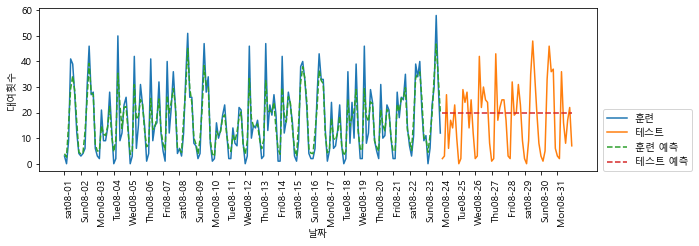

In [90]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,random_state=0)
eval_on_features(X,y,reg)


In [91]:
X_hour = citibike.index.hour.values.reshape(-1,1)

score : 0.60


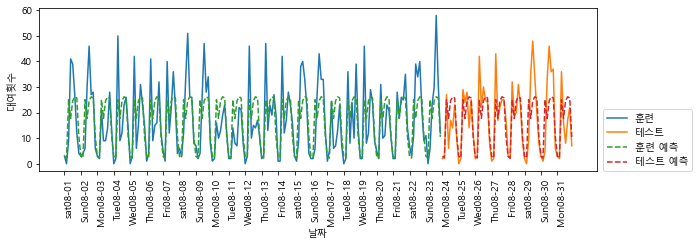

In [92]:
eval_on_features(X_hour,y,reg)

score : 0.84


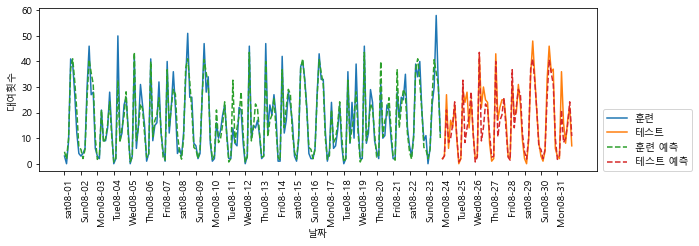

In [93]:
X_dayofweek = citibike.index.dayofweek.values.reshape(-1, 1)
X_hour = citibike.index.hour.values.reshape(-1, 1)
X_hour_week = np.hstack([X_dayofweek, X_hour])
eval_on_features(X_hour_week, y, reg)

score : 0.13


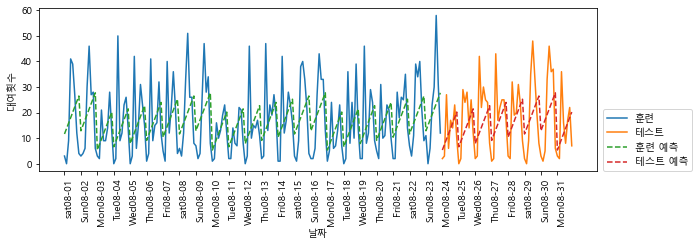

In [94]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())

score : 0.62


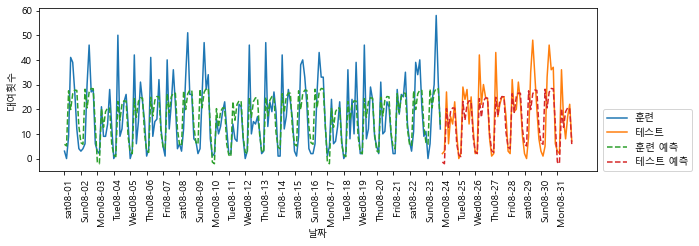

In [95]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y,Ridge())

score : 0.85


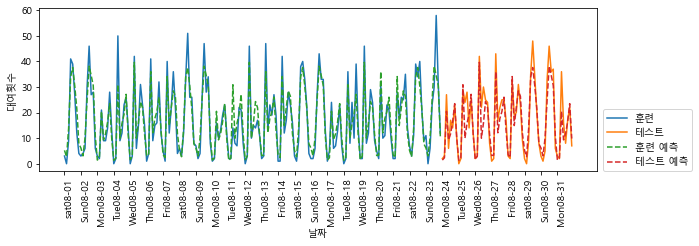

In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only = True, include_bias = False)

X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr2 = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr2)

In [97]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월","화","수",'목','금','토','일']
features = day + hour

In [98]:
lr2

Ridge()

In [99]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr2.coef_ != 0]
coef_nonzero = lr2.coef_[lr2.coef_ != 0]

Text(0, 0.5, '계수 크기')

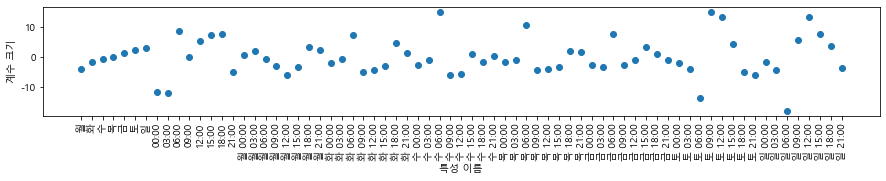

In [100]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('특성 이름')
plt.ylabel('계수 크기')

In [88]:
len(coef_nonzero)

71